In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import xarray as xr
import meshio


In [10]:
! wget https://storage.googleapis.com/ldeo-glaciology/elmer_janie/output_vals/Output0100.vtu


--2020-11-24 15:43:58--  https://storage.googleapis.com/ldeo-glaciology/elmer_janie/output_vals/Output0100.vtu
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3485120 (3.3M) [application/octet-stream]
Saving to: ‘Output0100.vtu’

Output0100.vtu      100%[===================>]   3.32M  --.-KB/s    in 0.07s   

2020-11-24 15:43:58 (47.3 MB/s) - ‘Output0100.vtu’ saved [3485120/3485120]



In [2]:
#surfurl = 'gs://ldeo-glaciology/elmer_janie/output_vals/Output0001.vtu'


In [2]:
mesh = meshio.read('Output0100.vtu', file_format= 'vtu')

In [64]:
#info about mesh grid (set by user in model)
xgrid_cells = 1000
ygrid_cells = 30

xgrid_pts = xgrid_cells + 1
ygrid_pts = ygrid_cells + 1

xnodes = np.array(range(xgrid_pts))
ynodes = np.array(range(ygrid_pts))

In [65]:
ynodes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [36]:
mesh?

Type:        Mesh
String form:
<meshio mesh object>
  Number of points: 31031
  Number of cells:
    quad: 30000
    line: 2060
  Point data: depth, height, pressure, temperature, age, velocity
File:        /srv/conda/envs/notebook/lib/python3.7/site-packages/meshio/_mesh.py
Docstring:   <no docstring>


In [57]:
mesh.points[:,2]

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
coords = mesh.points

In [54]:
coords[:,0]

array([-10000.,  -9980.,  -9960., ...,   9960.,   9980.,  10000.])

In [12]:
mesh.point_data

{'depth': array([[501.74985829],
        [501.87925934],
        [502.03745095],
        ...,
        [  0.        ],
        [  0.        ],
        [  0.        ]]),
 'height': array([[  0.        ],
        [  0.        ],
        [  0.        ],
        ...,
        [473.19663875],
        [472.13815746],
        [471.12860036]]),
 'pressure': array([[3.8784842 ],
        [4.20502508],
        [4.54385694],
        ...,
        [0.0870551 ],
        [0.09161384],
        [0.0994165 ]]),
 'temperature': array([[257.73628843],
        [257.76482518],
        [257.82654591],
        ...,
        [253.15      ],
        [253.15      ],
        [253.15      ]]),
 'age': array([[1.14510290e+03],
        [3.37369546e+03],
        [2.34351971e+03],
        ...,
        [1.05469674e-01],
        [1.71703200e-01],
        [2.44591036e-01]]),
 'velocity': array([[-2.17420902,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.    

In [32]:
velx = mesh.point_data['velocity'][:,0].reshape((ygrid_pts,xgrid_pts))
vely = mesh.point_data['velocity'][:,1].reshape((ygrid_pts,xgrid_pts))

xdim = mesh.points[:,0].reshape((ygrid_pts,xgrid_pts))
ydim = mesh.points[:,1].reshape((ygrid_pts,xgrid_pts))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


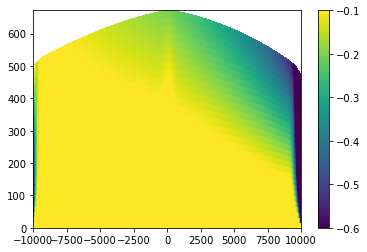

In [46]:
ggg = plt.pcolormesh(xdim,ydim, vely,shading = 'flat',vmin = -0.6, vmax = -0.1)
plt.colorbar(ggg)

In [66]:
data = xr.Dataset(data_vars = {'vel_x' : (('ynode','xnode'), velx) ,'vel_y' :(('ynode','xnode'), vely), 'yvals': (('ynode','xnode'),ydim)}, coords = {'xnode': xnodes, 'ynode': ynodes})

In [67]:
data

<xarray.Dataset>
Dimensions:  (xnode: 1001, ynode: 31)
Coordinates:
  * xnode    (xnode) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999 1000
  * ynode    (ynode) int64 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29 30
Data variables:
    vel_x    (ynode, xnode) float64 -2.174 0.0 0.0 0.0 ... 6.327 6.257 6.175
    vel_y    (ynode, xnode) float64 0.0 0.0 0.0 0.0 ... -0.7179 -0.6901 -0.6792
    yvals    (ynode, xnode) float64 0.0 0.0 0.0 0.0 ... 474.3 473.2 472.1 471.1

In [12]:
xdim.reshape()

array([-10000.,  -9980.,  -9960., ...,   9960.,   9980.,  10000.])

In [14]:
da_sal = xr.DataArray(vely, dims = ['xdim','ydim'],
                     coords = {'xdim':xdim,'ydim':ydim})

ValueError: different number of dimensions on data and dims: 1 vs 2

In [17]:
np.shape(np.arange(-10000,10020,20))

(1001,)

In [19]:
31031/1001

31.0

In [22]:
600/30

20.0